In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_csv('./data/boston_airbnb/boston_listings.csv')
df_listings = pd.read_csv('./data/boston_airbnb/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
df_listings.shape

(3585, 95)

In [4]:
#columns with no nulls
missing_cols = set(df_listings.columns[df_listings.isnull().mean()==0.0])
print(missing_cols)


{'host_is_superhost', 'country_code', 'name', 'availability_30', 'calculated_host_listings_count', 'is_location_exact', 'amenities', 'minimum_nights', 'calendar_last_scraped', 'host_total_listings_count', 'requires_license', 'maximum_nights', 'picture_url', 'guests_included', 'number_of_reviews', 'country', 'cancellation_policy', 'accommodates', 'state', 'availability_60', 'instant_bookable', 'id', 'require_guest_profile_picture', 'street', 'room_type', 'host_identity_verified', 'host_id', 'listing_url', 'scrape_id', 'experiences_offered', 'host_has_profile_pic', 'neighbourhood_cleansed', 'smart_location', 'extra_people', 'host_url', 'bed_type', 'description', 'calendar_updated', 'host_verifications', 'price', 'latitude', 'host_listings_count', 'require_guest_phone_verification', 'host_thumbnail_url', 'longitude', 'host_picture_url', 'availability_365', 'last_scraped', 'availability_90', 'host_name', 'host_since'}


In [5]:
#columns with more than 50% missing values
missing_cols = set(df_listings.columns[df_listings.isnull().mean()>0.5])
print(missing_cols)

{'security_deposit', 'monthly_price', 'has_availability', 'weekly_price', 'notes', 'jurisdiction_names', 'neighbourhood_group_cleansed', 'license', 'square_feet'}


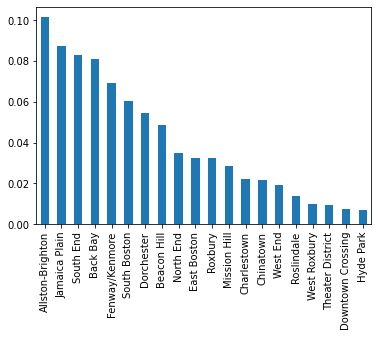

In [6]:
#fractions in each of the neighbourhoods (highest 20)
vals = df_listings['neighbourhood'].value_counts()
#print(vals)
((vals[:20])/df_listings.shape[0]).plot(kind="bar");

In [28]:
df_scoreloc = df_listings[['name','review_scores_location']]
df_scoreloc.head()

,name,review_scores_location
0,Sunny Bungalow in the City,NaN
1,Charming room in pet friendly apt,9.0
2,Mexican Folk Art Haven in Boston,9.0
3,Spacious Sunny Bedroom Suite in Historic Home,10.0
4,Come Home to Boston,9.0


In [1]:
#remove $ signs from price
#explore relationship between price and cancellation policy for single neighbourhood

df = df_listings.copy()
df.price = df.price.apply(lambda x: x.strip('$'))
df.price =  pd.to_numeric(df['price'],errors='coerce')
#df.price.head()

pd.DataFrame(df.query("neighbourhood == 'Allston-Brighton'").groupby(['cancellation_policy']).mean()['price']  )

NameError: name 'df_listings' is not defined

In [19]:
#remove $ signs from price - create new column
df_listings['price_val'] = df_listings.price.apply(lambda x: x.strip('$'))
df_listings['price_val']  =  pd.to_numeric(df_listings['price_val'] ,errors='coerce')
df_listings['price_val'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price_val, dtype: float64

In [20]:
#mean price
df_listings['price_val'].mean()

169.07276798208787

In [21]:
def room_private(room_type_str):
    '''
    INPUT
        room_type_str - a string to specify the room type
    
    OUTPUT
        return 1 if the string is in ("Private room")
        return 0 otherwise
    '''
    if room_type_str in ("Private room"):
        return 1
    else:
        return 0



In [22]:
df_listings['pvt_room'] = df_listings["room_type"].apply(room_private)
pvt_room_perc = df_listings['pvt_room'].mean()
print(pvt_room_perc)

0.38437935843793586


In [23]:
df_pvt = df_listings[df_listings['pvt_room']==1] 
df_not_pvt = df_listings[df_listings['pvt_room']==0] 

print(df_t[['name','price_val']][:5])

print(df_t['price_val'].mean())
print(df_f['price_val'].mean())

NameError: name 'df_t' is not defined

In [36]:
df_listings.groupby(['bed_type']).mean()['price_val'].sort_values().dropna()


bed_type
Airbed            78.675000
Futon             85.254902
Couch             99.600000
Pull-out Sofa    101.612903
Real Bed         172.175530
Name: price_val, dtype: float64